In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
sales = pd.read_csv("sales_data.csv")
customers = pd.read_csv("customer_data.csv")

# Clean column names (important)
sales.columns = sales.columns.str.strip()
customers.columns = customers.columns.str.strip()

print("Sales Columns:", sales.columns)
print("Customer Columns:", customers.columns)


Sales Columns: Index(['Date', 'Product', 'Quantity', 'Price', 'Customer_ID', 'Region',
       'Total_Sales'],
      dtype='object')
Customer Columns: Index(['Customer_ID', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Contract',
       'PaymentMethod', 'PaperlessBilling', 'SeniorCitizen', 'Churn'],
      dtype='object')


In [45]:
# Convert Date column
sales['Date'] = pd.to_datetime(sales['Date'])

# Create Month column
sales['Month'] = sales['Date'].dt.to_period('M')


In [46]:
# Clean column names
sales.columns = sales.columns.str.strip()

# Convert correct Date column
sales['Date'] = pd.to_datetime(sales['Date'])

# Create Month column
sales['Month'] = sales['Date'].dt.to_period('M')

sales.head()


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales,Month
0,2024-01-01,Phone,7,37300,CUST001,East,261100,2024-01
1,2024-01-02,Headphones,4,15406,CUST002,North,61624,2024-01
2,2024-01-03,Phone,2,21746,CUST003,West,43492,2024-01
3,2024-01-04,Headphones,1,30895,CUST004,East,30895,2024-01
4,2024-01-05,Laptop,8,39835,CUST005,North,318680,2024-01


In [47]:
df = pd.merge(sales, customers, on="Customer_ID", how="left")
df.head()


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales,Month,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,2024-01-01,Phone,7,37300,CUST001,East,261100,2024-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-02,Headphones,4,15406,CUST002,North,61624,2024-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-03,Phone,2,21746,CUST003,West,43492,2024-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-04,Headphones,1,30895,CUST004,East,30895,2024-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-05,Laptop,8,39835,CUST005,North,318680,2024-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
total_revenue = df['Total_Sales'].sum()
total_customers = df['Customer_ID'].nunique()
avg_order_value = df['Total_Sales'].mean()

print("Total Revenue:", total_revenue)
print("Total Customers:", total_customers)
print("Average Order Value:", round(avg_order_value, 2))


Total Revenue: 12365048
Total Customers: 100
Average Order Value: 123650.48


In [54]:
sales.columns = sales.columns.str.strip().str.lower()
customers.columns = customers.columns.str.strip().str.lower()

df = pd.merge(sales, customers, on="customer_id", how="left")

print(df.columns)


Index(['date', 'product', 'quantity', 'price', 'customer_id', 'region',
       'total_sales', 'month', 'tenure', 'monthlycharges', 'totalcharges',
       'contract', 'paymentmethod', 'paperlessbilling', 'seniorcitizen',
       'churn'],
      dtype='object')


In [63]:
print(customers.columns)


Index(['customer_id', 'tenure', 'monthlycharges', 'totalcharges', 'contract',
       'paymentmethod', 'paperlessbilling', 'seniorcitizen', 'churn'],
      dtype='object')


In [64]:
top_customers = (
    df.groupby('customer_id')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_customers


customer_id
CUST016    373932
CUST007    363870
CUST083    350888
CUST073    349510
CUST020    333992
Name: total_sales, dtype: int64

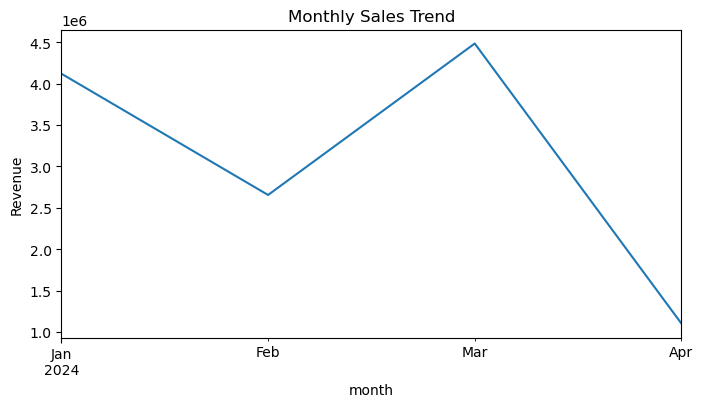

In [67]:
monthly_sales = df.groupby('month')['total_sales'].sum()

monthly_sales.plot(kind='line', figsize=(8,4))
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.show()


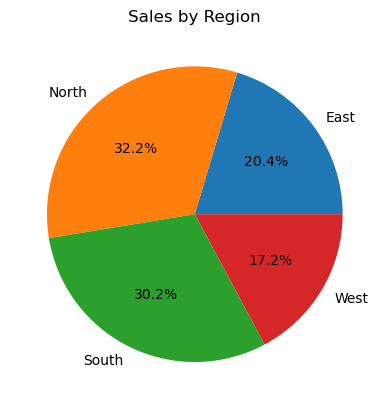

In [69]:
region_sales = df.groupby('region')['total_sales'].sum()

region_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales by Region")
plt.ylabel("")
plt.show()


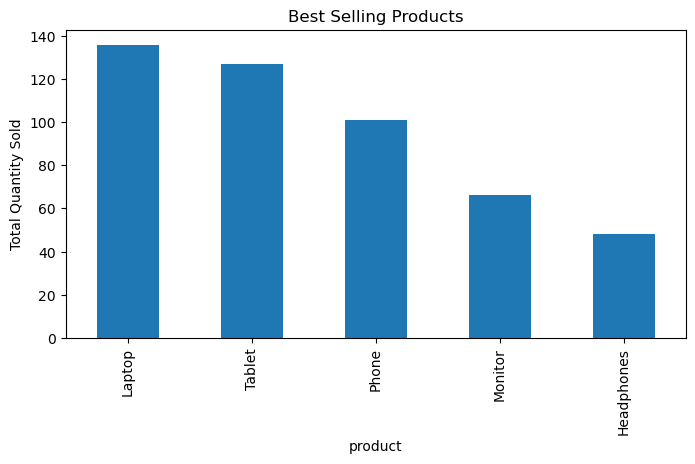

In [73]:
top_products = (
    df.groupby('product')['quantity']
    .sum()
    .sort_values(ascending=False)
)

top_products.plot(kind='bar', figsize=(8,4))
plt.title("Best Selling Products")
plt.ylabel("Total Quantity Sold")
plt.show()


In [75]:
pivot = pd.pivot_table(
    df,
    values='total_sales',
    index='region',
    columns='month',
    aggfunc='sum'
)

pivot


month,2024-01,2024-02,2024-03,2024-04
region,,,,
East,792969,746674,844016,135980
North,1726624,640784,1419350,196877
South,1088182,422941,1600314,626415
West,512749,845651,621326,144196
